# NumPy Basics: Arrays and Vectorized Computation

In [1]:
import numpy as np

In [ ]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))
my_arr
#my_list

In [ ]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

## The NumPy ndarray: A Multidimensional Array Object

In [1]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[-0.2563818 , -1.3007369 , -0.94953554],
       [ 1.02770592,  1.35962679, -0.62127049]])

In [2]:
data * 10
data + data

array([[-0.5127636 , -2.60147381, -1.89907107],
       [ 2.05541185,  2.71925359, -1.24254099]])

In [5]:
data.shape
#data.dtype

(2, 3)

### Creating ndarrays

In [2]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [3]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [5]:
arr2.ndim
arr2.shape

(2, 4)

In [ ]:
arr1.dtype
arr2.dtype

In [ ]:
np.zeros(10)
np.zeros((3, 6))
np.empty((2, 3, 2))

In [ ]:
np.arange(15)

### Data Types for ndarrays

The data type or dtype is a special object containing the information (or metadata,
data about data) the ndarray needs to interpret a chunk of memory as a particular
type of data:

In [7]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype
#arr2.dtype

dtype('float64')

You can explicitly convert or cast an array from one dtype to another using ndarray’s
astype method:

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype
float_arr = arr.astype(np.float64)
float_arr.dtype

In this example, integers were cast to floating point. If I cast some floating-point
numbers to be of integer dtype, the decimal part will be truncated:

In [ ]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

If you have an array of strings representing numbers, you can use astype to convert
them to numeric form:

If casting were to fail for some reason (like a string that cannot be converted to
float64), a ValueError will be raised. Here I was a bit lazy and wrote float instead
of np.float64;

In [7]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

Calling astype always creates a new array (a copy of the data), even
if the new dtype is the same as the old dtype.

In [ ]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

In [ ]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

### Arithmetic with NumPy Arrays

Arrays are important because they enable you to express batch operations on data
without writing any for loops. NumPy users call this vectorization. Any arithmetic
operations between equal-size arrays applies the operation element-wise:

In [9]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr
#arr * arr
#arr - arr

array([[1., 2., 3.],
       [4., 5., 6.]])

Arithmetic operations with scalars propagate the scalar argument to each element in
the array:

In [10]:
#1 / arr
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

Comparisons between arrays of the same size yield boolean arrays:

In [ ]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2
arr2 > arr

### Basic Indexing and Slicing

NumPy array indexing is a rich topic, as there are many ways you may want to select
a subset of your data or individual elements. One-dimensional arrays are simple; on
the surface they act similarly to Python lists:

In [ ]:
arr = np.arange(10)

In [ ]:
arr

In [ ]:
arr[5]

In [ ]:
arr[0:10]

In [ ]:
arr[5:8]

In [ ]:
arr[5:8] = 12

In [ ]:
arr

As you can see, if you assign a scalar value to a slice, as in arr[5:8] = 12, the value is
propagated (or broadcasted henceforth) to the entire selection. An important first distinction
from Python’s built-in lists is that array slices are views on the original array.
This means that the data is not copied, and any modifications to the view will be
reflected in the source array.
To give an example of this, I first create a slice of arr:

In [ ]:
arr_slice = arr[5:8]
arr_slice

Now, when I change values in arr_slice, the mutations are reflected in the original
array arr:

In [ ]:
arr_slice[1] = 12345
arr

The “bare” slice [:] will assign to all values in an array:

In [ ]:
arr_slice[:] = 64
arr

If you are new to NumPy, you might be surprised by this, especially if you have used
other array programming languages that copy data more eagerly. As NumPy has been
designed to be able to work with very large arrays, you could imagine performance
and memory problems if NumPy insisted on always copying data.

With higher dimensional arrays, you have many more options. In a two-dimensional
array, the elements at each index are no longer scalars but rather one-dimensional
arrays:
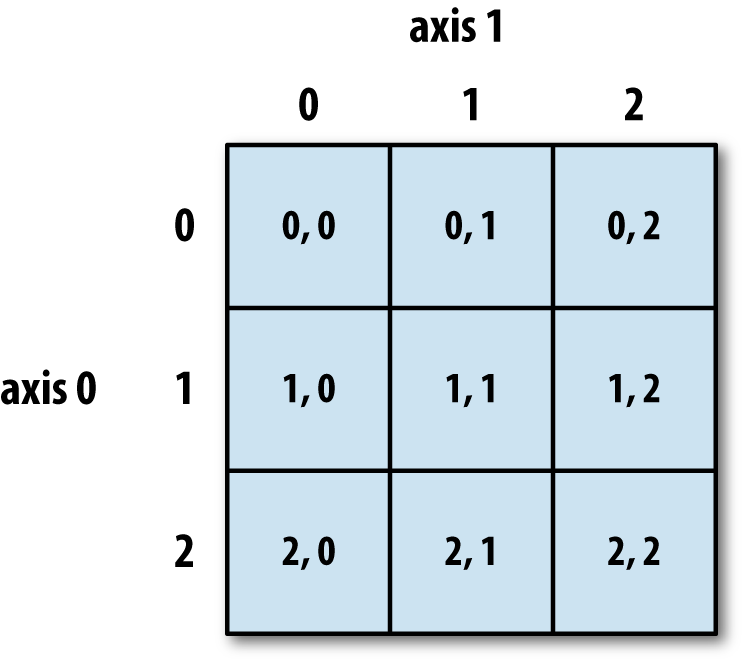

See Figure for an illustration of indexing on a two-dimensional array. I find it
helpful to think of axis 0 as the “rows” of the array and axis 1 as the “columns.”


In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

In [ ]:
arr2d[2]
arr2d[0][2]
arr2d[0, 2]

In multidimensional arrays, if you omit later indices, the returned object will be a
lower dimensional ndarray consisting of all the data along the higher dimensions. So
in the 2 × 2 × 3 array arr3d:

In [ ]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

arr3d[0] is a 2 × 3 array:

In [ ]:
arr3d[0]

Both scalar values and arrays can be assigned to arr3d[0]:

In [ ]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d
arr3d[0] = old_values
arr3d

Similarly, arr3d[1, 0] gives you all of the values whose indices start with (1, 0),
forming a 1-dimensional array:

In [ ]:
arr3d[1, 0]

In [ ]:
x = arr3d[1]
x
x[0]

Note that in all of these cases where subsections of the array have been selected, the
returned arrays are views.

#### Indexing with slices

Like one-dimensional objects such as Python lists, ndarrays can be sliced with the
familiar syntax:

In [ ]:
arr

In [ ]:
arr[1:6]

Consider the two-dimensional array from before, arr2d. Slicing this array is a bit
different:

In [ ]:
arr2d


In [ ]:
arr2d[:2]

As you can see, it has sliced along axis 0, the first axis. A slice, therefore, selects a
range of elements along an axis. It can be helpful to read the expression arr2d[:2] as
“select the first two rows of arr2d.”

You can pass multiple slices just like you can pass multiple indexes:

In [ ]:
arr2d[:2, 1:]

When slicing like this, you always obtain array views of the same number of dimensions.
By mixing integer indexes and slices, you get lower dimensional slices.

For example, I can select the second row but only the first two columns like so:

In [ ]:
arr2d[1, :2]

Similarly, I can select the third column but only the first two rows like so:

In [ ]:
arr2d[:2, 2]

See Figure for an illustration. Note that a colon by itself means to take the entire
axis, so you can slice only higher dimensional axes by doing:
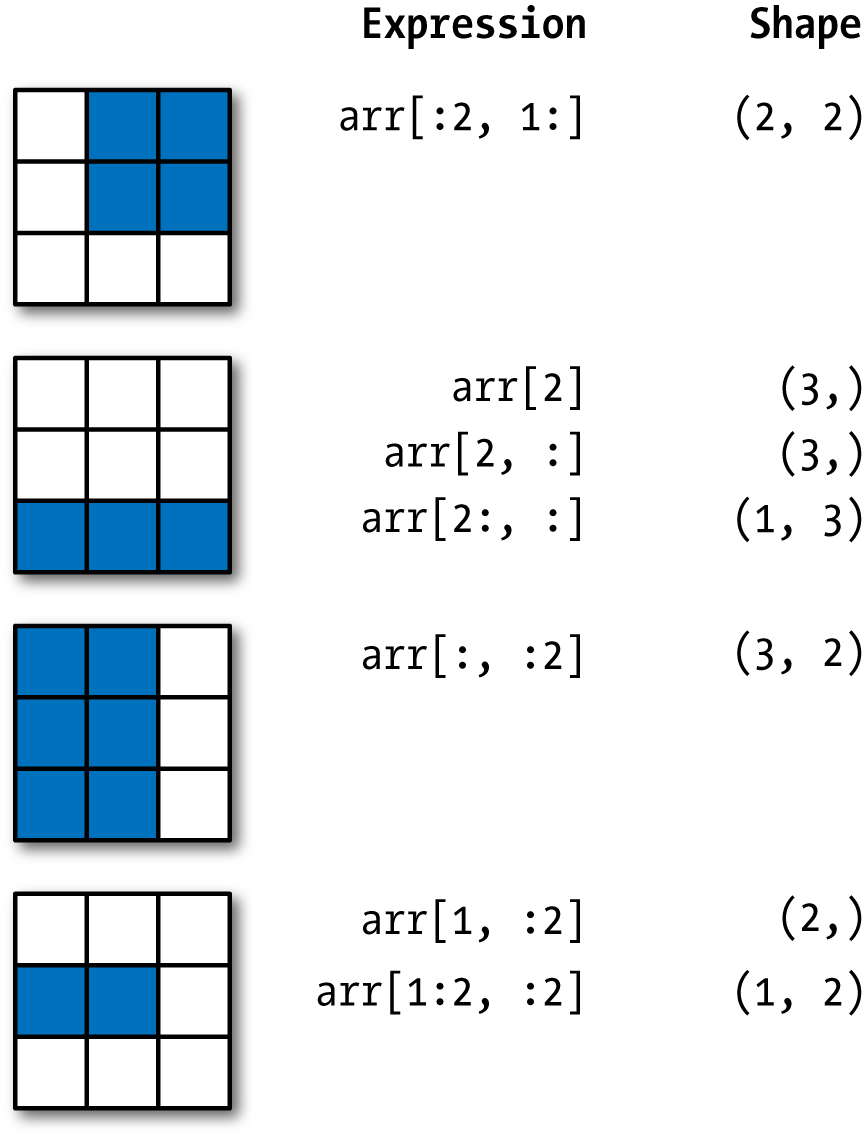

In [ ]:
arr2d[:, :1]

assigning to a slice expression assigns to the whole selection:

In [ ]:
arr2d[:2, 1:] = 0
arr2d

### Boolean Indexing

Let’s consider an example where we have some data in an array and an array of names
with duplicates. I’m going to use here the randn function in numpy.random to generate
some random normally distributed data:

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [ ]:
names

In [ ]:
data = np.random.randn(7, 4)

In [ ]:
data

Suppose each name corresponds to a row in the data array and we wanted to select
all the rows with corresponding name 'Bob'. Like arithmetic operations, comparisons
(such as ==) with arrays are also vectorized. Thus, comparing names with the
string 'Bob' yields a boolean array:

In [ ]:
names == 'Bob'

This boolean array can be passed when indexing the array:

In [ ]:
data[names == 'Bob']

In these examples, I select from the rows where names == 'Bob' and index the columns,
too:

In [ ]:
data[names == 'Bob', 2:]

In [ ]:
data[names == 'Bob', 3]

To select everything but 'Bob', you can either use != or negate the condition using ~:

In [ ]:
names != 'Bob'

In [ ]:
data[~(names == 'Bob')]

The ~ operator can be useful when you want to invert a general condition:

In [ ]:
cond = names == 'Bob'


In [ ]:
data[~cond]

Selecting two of the three names to combine multiple boolean conditions, use
boolean arithmetic operators like & (and) and | (or):

In [ ]:
mask = (names == 'Bob') | (names == 'Will')
mask
data[mask]

Setting values with boolean arrays works in a common-sense way. To set all of the
negative values in data to 0 we need only do:

In [ ]:
data[data < 0] = 0
data

In [ ]:
data[names != 'Joe'] = 7
data

### Fancy Indexing

Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays.
Suppose we had an 8 × 4 array:

In [ ]:
arr = np.empty((8, 4))
arr

In [ ]:
for i in range(8):
    arr[i] = i
arr

To select out a subset of the rows in a particular order, you can simply pass a list or
ndarray of integers specifying the desired order:

In [ ]:
arr[[4, 3, 0, 6]]

Using negative indices selects rows from
the end:

In [ ]:
arr[[-3, -5, -7]]

In [ ]:
arr = np.arange(32).reshape((8, 4))
arr

In [ ]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

In [ ]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

### Transposing Arrays and Swapping Axes

In [ ]:
arr = np.arange(15).reshape((3, 5))
arr

In [ ]:
arr.T

When doing matrix computations, you may do this very often—for example, when
computing the inner matrix product using np.dot:

In [ ]:
arr = np.random.randn(6, 3)
arr

In [ ]:
np.dot(arr.T, arr)

In [ ]:
arr = np.arange(16).reshape((2, 2, 4))
arr


In [ ]:
arr.transpose((1, 0, 2))

In [ ]:
arr

In [ ]:
arr.swapaxes(1, 2)

## Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations
on data in ndarrays. You can think of them as fast vectorized wrappers for simple
functions that take one or more scalar values and produce one or more scalar results.
Many ufuncs are simple element-wise transformations, like sqrt or exp:

In [ ]:
arr = np.arange(10)
arr

In [ ]:
np.sqrt(arr)

In [ ]:
np.exp(arr)

These are referred to as unary ufuncs. Others, such as add or maximum, take two arrays
(thus, binary ufuncs) and return a single array as the result:

In [ ]:
x = np.random.randn(8)
y = np.random.randn(8)
x

In [ ]:
y

In [ ]:
np.maximum(x, y)

Here, numpy.maximum computed the element-wise maximum of the elements in x and
y.

While not common, a ufunc can return multiple arrays. modf is one example, a vectorized
version of the built-in Python divmod; it returns the fractional and integral
parts of a floating-point array:

In [ ]:
arr = np.random.randn(7) * 5
arr


In [ ]:
remainder, whole_part = np.modf(arr)
remainder


In [ ]:
whole_part

In [ ]:
arr

In [ ]:
np.sqrt(arr)

In [ ]:
np.sqrt(arr, arr)

In [ ]:
arr

## Array-Oriented Programming with Arrays

Using NumPy arrays enables you to express many kinds of data processing tasks as
concise array expressions that might otherwise require writing loops. This practice of
replacing explicit loops with array expressions is commonly referred to as vectorization.
In general, vectorized array operations will often be one or two (or more) orders
of magnitude faster than their pure Python equivalents, with the biggest impact in
any kind of numerical computations.

As a simple example, suppose we wished to evaluate the function sqrt(x^2 + y^2)
across a regular grid of values. The np.meshgrid function takes two 1D arrays and
produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

In [ ]:
points = np.arange(-5, 5, 1)
points

In [ ]:
xs, ys = np.meshgrid(points, points)
xs

In [ ]:
ys

In [ ]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

In [ ]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
xs

In [ ]:
ys

In [ ]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

I use matplotlib to create visualizations of this twodimensional
array:

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [ ]:
plt.draw()

In [ ]:
plt.close('all')

### Expressing Conditional Logic as Array Operations

The numpy.where function is a vectorized version of the ternary expression x if con
dition else y. Suppose we had a boolean array and two arrays of values:

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from xarr whenever the corresponding value in
cond is True, and otherwise take the value from yarr. A list comprehension doing
this might look like:

In [ ]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

This has multiple problems. First, it will not be very fast for large arrays (because all
the work is being done in interpreted Python code). Second, it will not work with
multidimensional arrays. With np.where you can write this very concisely:

In [ ]:
result = np.where(cond, xarr, yarr)
result

The second and third arguments to np.where don’t need to be arrays; one or both of
them can be scalars. A typical use of where in data analysis is to produce a new array
of values based on another array. Suppose you had a matrix of randomly generated
data and you wanted to replace all positive values with 2 and all negative values with
–2. This is very easy to do with np.where:

In [ ]:
arr = np.random.randn(4, 4)
arr

In [ ]:
arr > 0

In [ ]:
np.where(arr > 0, 2, -2)

You can combine scalars and arrays when using np.where. For example, I can replace
all positive values in arr with the constant 2 like so:

In [ ]:
np.where(arr > 0, 2, arr) # set only positive values to 2

### Mathematical and Statistical Methods

A set of mathematical functions that compute statistics about an entire array or about
the data along an axis are accessible as methods of the array class. You can use aggregations
(often called reductions) like sum, mean, and std (standard deviation) either by
calling the array instance method or using the top-level NumPy function.
Here I generate some normally distributed random data and compute some aggregate
statistics:

In [ ]:
arr = np.random.randn(5, 4)
arr

In [ ]:
arr.mean()

In [ ]:
np.mean(arr)

In [ ]:
arr.sum()

Functions like mean and sum take an optional axis argument that computes the statistic
over the given axis, resulting in an array with one fewer dimension:

In [ ]:
arr.mean(axis=1)

In [ ]:
arr.sum(axis=0)

Here, arr.mean(1) means “compute mean across the columns” where arr.sum(0)
means “compute sum down the rows.”

Other methods like cumsum and cumprod do not aggregate, instead producing an array
of the intermediate results:

In [ ]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr

In [ ]:
arr.cumsum()

In multidimensional arrays, accumulation functions like cumsum return an array of
the same size, but with the partial aggregates computed along the indicated axis
according to each lower dimensional slice:

In [ ]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

In [ ]:
arr.cumsum(axis=0)

In [ ]:
arr.cumprod(axis=1)

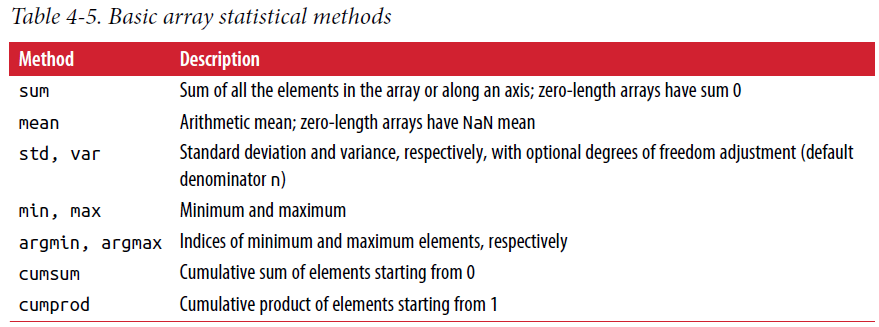

### Methods for Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus,
sum is often used as a means of counting True values in a boolean array:

In [ ]:
arr = np.random.randn(100)

In [ ]:
arr

In [ ]:
arr > 0

In [ ]:
(arr > 0).sum() # Number of positive values

There are two additional methods, any and all, useful especially for boolean arrays.
any tests whether one or more values in an array is True, while all checks if every
value is True:

In [ ]:
bools = np.array([False, False, True, False])

In [ ]:
bools.any()

In [ ]:
bools.all()

### Sorting

Like Python’s built-in list type, NumPy arrays can be sorted in-place with the sort
method:

In [ ]:
arr = np.random.randn(6)
arr
arr.sort()
arr

You can sort each one-dimensional section of values in a multidimensional array inplace
along an axis by passing the axis number to sort:

In [ ]:
arr = np.random.randn(5, 3)
arr
arr.sort(1)
arr

The top-level method np.sort returns a sorted copy of an array instead of modifying
the array in-place. A quick-and-dirty way to compute the quantiles of an array is to
sort it and select the value at a particular rank:

In [ ]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

### Unique and Other Set Logic

NumPy has some basic set operations for one-dimensional ndarrays. A commonly
used one is np.unique, which returns the sorted unique values in an array:

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

In [ ]:
np.unique(names)

In [ ]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [ ]:
np.unique(ints)

Contrast np.unique with the pure Python alternative:

In [ ]:
sorted(set(names))

Another function, np.in1d, tests membership of the values in one array in another,
returning a boolean array:

In [ ]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
values

In [ ]:
np.in1d(values, [2, 3, 6])

## File Input and Output with Arrays

np.save and np.load are the two workhorse functions for efficiently saving and loading
array data on disk. Arrays are saved by default in an uncompressed raw binary
format with file extension .npy:

In [ ]:
arr = np.arange(10)
np.save('some_array', arr)

If the file path does not already end in .npy, the extension will be appended. The array
on disk can then be loaded with np.load:

In [ ]:
np.load('some_array.npy')

You save multiple arrays in an uncompressed archive using np.savez and passing the
arrays as keyword arguments:

In [ ]:
np.savez('array_archive.npz', a=arr, b=arr)

When loading an .npz file, you get back a dict-like object that loads the individual
arrays lazily:

In [ ]:
arch = np.load('array_archive.npz')
arch['b']

If your data compresses well, you may wish to use numpy.savez_compressed instead:

In [ ]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [ ]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

## Linear Algebra

Linear algebra, like matrix multiplication, decompositions, determinants, and other
square matrix math, is an important part of any array library. Unlike some languages
like MATLAB, multiplying two two-dimensional arrays with * is an element-wise
product instead of a matrix dot product. Thus, there is a function dot, both an array
method and a function in the numpy namespace, for matrix multiplication:

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

In [ ]:
np.dot(x, y)

x.dot(y) is equivalent to np.dot(x, y):

A matrix product between a two-dimensional array and a suitably sized onedimensional
array results in a one-dimensional array:

In [ ]:
np.dot(x, np.ones(3))

The @ symbol (as of Python 3.5) also works as an infix operator that performs matrix
multiplication:

In [ ]:
x @ np.ones(3)

numpy.linalg has a standard set of matrix decompositions and things like inverse
and determinant. These are implemented under the hood via the same industrystandard
linear algebra libraries used in other languages like MATLAB and R, such as
BLAS, LAPACK, or possibly (depending on your NumPy build) the proprietary Intel
MKL (Math Kernel Library):

In [ ]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

## Pseudorandom Number Generation

The numpy.random module supplements the built-in Python random with functions
for efficiently generating whole arrays of sample values from many kinds of probability
distributions. For example, you can get a 4 × 4 array of samples from the standard
normal distribution using normal:

In [ ]:
samples = np.random.normal(size=(4, 4))
samples

Python’s built-in random module, by contrast, only samples one value at a time. As
you can see from this benchmark, numpy.random is well over an order of magnitude
faster for generating very large samples:

In [ ]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

We say that these are pseudorandom numbers because they are generated by an algorithm
with deterministic behavior based on the seed of the random number generator.
You can change NumPy’s random number generation seed using
np.random.seed:

In [ ]:
np.random.seed(1234)

The data generation functions in numpy.random use a global random seed. To avoid
global state, you can use numpy.random.RandomState to create a random number
generator isolated from others:

In [ ]:
rng = np.random.RandomState(1234)
rng.randn(10)

## Example: Random Walks

The simulation of random walks provides an illustrative application of utilizing array
operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and
–1 occurring with equal probability.
Here is a pure Python way to implement a single random walk with 1,000 steps using
the built-in random module:

In [ ]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [ ]:
plt.figure()

See Figure for an example plot of the first 100 values on one of these random
walks:

In [ ]:
plt.plot(walk[:100])

In [ ]:
np.random.seed(12345)

You might make the observation that walk is simply the cumulative sum of the random
steps and could be evaluated as an array expression. Thus, I use the np.random
module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the
cumulative sum:

In [ ]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [ ]:
walk.min()
walk.max()

In [ ]:
(np.abs(walk) >= 10).argmax()

### Simulating Many Random Walks at Once

In [ ]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

In [ ]:
walks.max()
walks.min()

In [ ]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

In [ ]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

In [ ]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

## Conclusion